# Flow

#### 1) df was created by combining 'races' and 'runs'

#### 2) df was splited into X_train, X_test, y_train, y_test before imputation to avoid any overfitting and data leakage

#### 3) The missing values in splited dataframes were being imputed with MissForesstExtra(XGBClassifer)

#### 4) Those splited dataframes were turned into torch.tensors

#### 5) Different DNN were built and trained and evaluated with those splited dataframes

#### 6) The best acc achieved were 0.7810 and 0.7829 for trainset and testset respectively

#### 7) Underfitting occurs, so we might need to increase the number of features to avoid it

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
races = pd.read_csv("races.csv", delimiter=",", header=0, index_col='race_id')
races.reset_index(inplace=True)
runs = pd.read_csv("runs.csv", delimiter=",", header=0)

In [75]:
races.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6349 entries, 0 to 6348
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   race_id             6349 non-null   int64  
 1   date                6349 non-null   object 
 2   venue               6349 non-null   object 
 3   race_no             6349 non-null   int64  
 4   config              6349 non-null   object 
 5   surface             6349 non-null   int64  
 6   distance            6349 non-null   int64  
 7   going               6349 non-null   object 
 8   horse_ratings       6349 non-null   object 
 9   prize               5887 non-null   float64
 10  race_class          6349 non-null   int64  
 11  sec_time1           6349 non-null   float64
 12  sec_time2           6349 non-null   float64
 13  sec_time3           6349 non-null   float64
 14  sec_time4           3634 non-null   float64
 15  sec_time5           821 non-null    float64
 16  sec_ti

In [76]:
runs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79447 entries, 0 to 79446
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   race_id          79447 non-null  int64  
 1   horse_no         79447 non-null  int64  
 2   horse_id         79447 non-null  int64  
 3   result           79447 non-null  int64  
 4   won              79447 non-null  float64
 5   lengths_behind   79447 non-null  float64
 6   horse_age        79447 non-null  int64  
 7   horse_country    79445 non-null  object 
 8   horse_type       79445 non-null  object 
 9   horse_rating     79447 non-null  int64  
 10  horse_gear       79447 non-null  object 
 11  declared_weight  79447 non-null  float64
 12  actual_weight    79447 non-null  int64  
 13  draw             79447 non-null  int64  
 14  position_sec1    79447 non-null  int64  
 15  position_sec2    79447 non-null  int64  
 16  position_sec3    79447 non-null  int64  
 17  position_sec

In [77]:
races.shape, runs.shape

((6349, 37), (79447, 37))

In [78]:
df = pd.merge(runs[['race_id', 'draw', 'horse_age', 'horse_country', 'horse_type', 'horse_rating', 'declared_weight', 'actual_weight', 'win_odds', 'result']], 
              races[['race_id', 'venue', 'config', 'surface', 'distance', 'going', 'race_class']], on='race_id')

In [83]:
df.drop('race_id', axis=1, inplace=True)

In [79]:
df.shape

(79447, 16)

In [80]:
df.isnull().sum().sort_values(ascending=False)

horse_country      2
horse_type         2
race_id            0
draw               0
horse_age          0
horse_rating       0
declared_weight    0
actual_weight      0
win_odds           0
result             0
venue              0
config             0
surface            0
distance           0
going              0
race_class         0
dtype: int64

In [81]:
df['horse_country'].sample(1)

65986    IRE
Name: horse_country, dtype: object

In [82]:
df['horse_type'].sample(1)

48778    Gelding
Name: horse_type, dtype: object

In [84]:
def top3(row):
    if row > 3:
        return 0
    else:
        return 1
    
df['result'] = df['result'].apply(top3)

In [86]:
X = df.drop('result', axis=1)
y = df['result']

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [88]:
for dataframe in [X_train, X_test, y_train, y_test]:
    print(dataframe.shape)

(55612, 14)
(23835, 14)
(55612,)
(23835,)


In [90]:
X_train.isnull().sum()

draw               0
horse_age          0
horse_country      1
horse_type         1
horse_rating       0
declared_weight    0
actual_weight      0
win_odds           0
venue              0
config             0
surface            0
distance           0
going              0
race_class         0
dtype: int64

In [91]:
X_test.isnull().sum()

draw               0
horse_age          0
horse_country      1
horse_type         1
horse_rating       0
declared_weight    0
actual_weight      0
win_odds           0
venue              0
config             0
surface            0
distance           0
going              0
race_class         0
dtype: int64

In [61]:
from MissForestExtra import MissForestExtra
mf = MissForestExtra()

In [70]:
from xgboost import XGBClassifier
xgbc = XGBClassifier(use_label_encoder=False)

In [92]:
X_train['horse_country'] = mf.impute(X_train, 'horse_country', xgbc)
X_test['horse_country'] = mf.impute(X_test, 'horse_country', xgbc)

[10:12:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:12:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:12:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


F:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


[10:13:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:13:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:13:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


F:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [93]:
X_train['horse_type'] = mf.impute(X_train, 'horse_type', xgbc)
X_test['horse_type'] = mf.impute(X_test, 'horse_type', xgbc)

[10:13:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:13:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:13:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


F:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


[10:13:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:13:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:13:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


F:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [94]:
X_train.isnull().sum()

draw               0
horse_age          0
horse_country      0
horse_type         0
horse_rating       0
declared_weight    0
actual_weight      0
win_odds           0
venue              0
config             0
surface            0
distance           0
going              0
race_class         0
dtype: int64

In [95]:
X_test.isnull().sum()

draw               0
horse_age          0
horse_country      0
horse_type         0
horse_rating       0
declared_weight    0
actual_weight      0
win_odds           0
venue              0
config             0
surface            0
distance           0
going              0
race_class         0
dtype: int64

In [98]:
for dataframe in [X_train, X_test]:
    for feat in ['horse_country', 'horse_type', 'venue', 'going', 'config']:
        dataframe[feat].replace(dataframe[feat].unique(), range(dataframe[feat].nunique()), inplace=True)

In [102]:
X_train.head()

,draw,horse_age,horse_country,horse_type,horse_rating,declared_weight,actual_weight,win_odds,venue,config,surface,distance,going,race_class
67372,10,3,0,0,60,1113.0,115,55.0,0,0,0,1400,0,3
5651,3,3,0,0,60,998.0,113,37.0,1,1,0,1000,0,3
49,1,3,1,1,60,1074.0,115,2.9,0,1,0,1200,1,1
49758,3,3,0,0,69,1061.0,122,11.0,1,2,0,1200,1,3
54937,5,2,2,0,74,1253.0,126,99.0,0,3,0,1000,2,3


In [103]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [105]:
X_train = np.array(X_train.astype(np.float32))
y_train = np.array(y_train.astype(np.float32))
X_test = np.array(X_test.astype(np.float32))
y_test = np.array(y_test.astype(np.float32))

In [107]:
import torch
from torch import nn

In [108]:
# Convert data into torch tensors
X_train = torch.from_numpy(X_train)
y_train = torch.from_numpy((y_train).reshape(-1, 1))
X_test = torch.from_numpy(X_test)
y_test = torch.from_numpy((y_test).reshape(-1, 1))

In [109]:
N, D = X_train.shape

In [137]:
# Build the model
model = nn.Sequential(
    nn.Linear(D, 1),
    nn.ReLU(),
    nn.Sigmoid()
)

In [138]:
def train_model(X_train, y_train, X_test, y_test):
    # Loss and optimizer
    criterion = nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters())

    # Train the model
    n_epochs = 1000

    # Stuff to store
    train_losses = np.zeros(n_epochs)
    test_losses = np.zeros(n_epochs)

    for it in range(n_epochs):
        # zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(X_train)
        loss = criterion(outputs, y_train)

        # Backward and optimize
        loss.backward()
        optimizer.step()

        # Get test loss
        outputs_test = model(X_test)
        loss_test = criterion(outputs_test, y_test)

        # Save losses
        train_losses[it] = loss.item()
        test_losses[it] = loss_test.item()

        if (it + 1) % 50 == 0:
            print(f'Epoch {it+1}/{n_epochs}, Train Loss: {loss.item():.4f}, Test Loss: {loss_test.item():.4f}')
            
    # Plot the train loss and test loss per iteration
    plt.plot(train_losses, label='train loss')
    plt.plot(test_losses, label='test loss')
    plt.legend()
    plt.ylabel('Loss')
    plt.xlabel('epochs')
    sns.despine()
    plt.show()

    # Get accuracy
    with torch.no_grad():
        p_train = model(X_train)
        p_train = np.round(p_train.numpy())
        train_acc = np.mean(y_train.numpy() == p_train)

        p_test = model(X_test)
        p_test = np.round(p_test.numpy())
        test_acc = np.mean(y_test.numpy() == p_test)
    print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")
            
    return train_losses, test_losses, model

Epoch 50/1000, Train Loss: 0.7184, Test Loss: 0.7189
Epoch 100/1000, Train Loss: 0.7027, Test Loss: 0.7026
Epoch 150/1000, Train Loss: 0.6958, Test Loss: 0.6957
Epoch 200/1000, Train Loss: 0.6937, Test Loss: 0.6937
Epoch 250/1000, Train Loss: 0.6933, Test Loss: 0.6933
Epoch 300/1000, Train Loss: 0.6932, Test Loss: 0.6932
Epoch 350/1000, Train Loss: 0.6932, Test Loss: 0.6932
Epoch 400/1000, Train Loss: 0.6931, Test Loss: 0.6932
Epoch 450/1000, Train Loss: 0.6931, Test Loss: 0.6932
Epoch 500/1000, Train Loss: 0.6931, Test Loss: 0.6932
Epoch 550/1000, Train Loss: 0.6931, Test Loss: 0.6932
Epoch 600/1000, Train Loss: 0.6931, Test Loss: 0.6932
Epoch 650/1000, Train Loss: 0.6931, Test Loss: 0.6932
Epoch 700/1000, Train Loss: 0.6931, Test Loss: 0.6932
Epoch 750/1000, Train Loss: 0.6931, Test Loss: 0.6932
Epoch 800/1000, Train Loss: 0.6931, Test Loss: 0.6932
Epoch 850/1000, Train Loss: 0.6931, Test Loss: 0.6932
Epoch 900/1000, Train Loss: 0.6931, Test Loss: 0.6932
Epoch 950/1000, Train Loss: 0

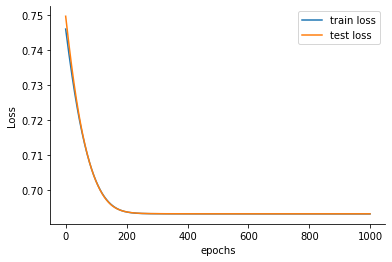

Train acc: 0.7593, Test acc: 0.7601


In [139]:
train_losses, test_losses, model = train_model(X_train, y_train, X_test, y_test)

train acc < test acc: Underfitting

Epoch 50/1000, Train Loss: 0.6931, Test Loss: 0.6932
Epoch 100/1000, Train Loss: 0.6930, Test Loss: 0.6931
Epoch 150/1000, Train Loss: 0.6930, Test Loss: 0.6931
Epoch 200/1000, Train Loss: 0.6928, Test Loss: 0.6929
Epoch 250/1000, Train Loss: 0.6926, Test Loss: 0.6927
Epoch 300/1000, Train Loss: 0.6926, Test Loss: 0.6926
Epoch 350/1000, Train Loss: 0.6925, Test Loss: 0.6926
Epoch 400/1000, Train Loss: 0.6924, Test Loss: 0.6925
Epoch 450/1000, Train Loss: 0.6924, Test Loss: 0.6924
Epoch 500/1000, Train Loss: 0.6923, Test Loss: 0.6924
Epoch 550/1000, Train Loss: 0.6922, Test Loss: 0.6923
Epoch 600/1000, Train Loss: 0.6922, Test Loss: 0.6923
Epoch 650/1000, Train Loss: 0.6921, Test Loss: 0.6922
Epoch 700/1000, Train Loss: 0.6921, Test Loss: 0.6922
Epoch 750/1000, Train Loss: 0.6920, Test Loss: 0.6922
Epoch 800/1000, Train Loss: 0.6920, Test Loss: 0.6921
Epoch 850/1000, Train Loss: 0.6919, Test Loss: 0.6921
Epoch 900/1000, Train Loss: 0.6919, Test Loss: 0.6920
Epoch 950/1000, Train Loss: 0

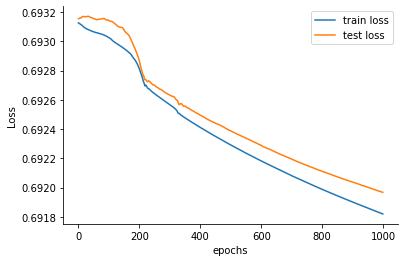

Train acc: 0.7686, Test acc: 0.7682


In [141]:
# second model
model2 = nn.Sequential(
    nn.Linear(D, 7),
    nn.ReLU(),
    nn.Linear(7, 1),
    nn.ReLU(),
    nn.Sigmoid()
)

train_losses2, test_losses2, model2 = train_model(X_train, y_train, X_test, y_test)

train acc > test acc: slight overfitting

Epoch 50/1000, Train Loss: 0.6918, Test Loss: 0.6919
Epoch 100/1000, Train Loss: 0.6917, Test Loss: 0.6919
Epoch 150/1000, Train Loss: 0.6917, Test Loss: 0.6919
Epoch 200/1000, Train Loss: 0.6916, Test Loss: 0.6918
Epoch 250/1000, Train Loss: 0.6916, Test Loss: 0.6918
Epoch 300/1000, Train Loss: 0.6916, Test Loss: 0.6917
Epoch 350/1000, Train Loss: 0.6915, Test Loss: 0.6917
Epoch 400/1000, Train Loss: 0.6915, Test Loss: 0.6917
Epoch 450/1000, Train Loss: 0.6915, Test Loss: 0.6916
Epoch 500/1000, Train Loss: 0.6914, Test Loss: 0.6916
Epoch 550/1000, Train Loss: 0.6914, Test Loss: 0.6916
Epoch 600/1000, Train Loss: 0.6914, Test Loss: 0.6916
Epoch 650/1000, Train Loss: 0.6913, Test Loss: 0.6915
Epoch 700/1000, Train Loss: 0.6913, Test Loss: 0.6915
Epoch 750/1000, Train Loss: 0.6913, Test Loss: 0.6915
Epoch 800/1000, Train Loss: 0.6912, Test Loss: 0.6915
Epoch 850/1000, Train Loss: 0.6912, Test Loss: 0.6914
Epoch 900/1000, Train Loss: 0.6912, Test Loss: 0.6914
Epoch 950/1000, Train Loss: 0

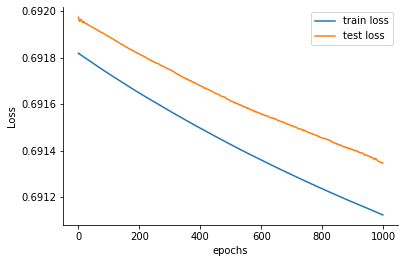

Train acc: 0.7728, Test acc: 0.7729


In [143]:
# third model
model3 = nn.Sequential(
    nn.Linear(D, int(D * 0.7)),
    nn.ReLU(),
    nn.Linear(int(D * 0.7), int(D * 0.4)),
    nn.ReLU(),
    nn.Linear(int(D * 0.4), 1),
    nn.ReLU(),
    nn.Sigmoid()
)

train_losses3, test_losses3, model3 = train_model(X_train, y_train, X_test, y_test)

Epoch 50/1000, Train Loss: 0.6911, Test Loss: 0.6913
Epoch 100/1000, Train Loss: 0.6911, Test Loss: 0.6913
Epoch 150/1000, Train Loss: 0.6910, Test Loss: 0.6913
Epoch 200/1000, Train Loss: 0.6910, Test Loss: 0.6912
Epoch 250/1000, Train Loss: 0.6910, Test Loss: 0.6912
Epoch 300/1000, Train Loss: 0.6909, Test Loss: 0.6912
Epoch 350/1000, Train Loss: 0.6909, Test Loss: 0.6912
Epoch 400/1000, Train Loss: 0.6909, Test Loss: 0.6912
Epoch 450/1000, Train Loss: 0.6909, Test Loss: 0.6911
Epoch 500/1000, Train Loss: 0.6908, Test Loss: 0.6911
Epoch 550/1000, Train Loss: 0.6908, Test Loss: 0.6911
Epoch 600/1000, Train Loss: 0.6908, Test Loss: 0.6911
Epoch 650/1000, Train Loss: 0.6908, Test Loss: 0.6911
Epoch 700/1000, Train Loss: 0.6908, Test Loss: 0.6910
Epoch 750/1000, Train Loss: 0.6907, Test Loss: 0.6910
Epoch 800/1000, Train Loss: 0.6907, Test Loss: 0.6910
Epoch 850/1000, Train Loss: 0.6907, Test Loss: 0.6910
Epoch 900/1000, Train Loss: 0.6907, Test Loss: 0.6910
Epoch 950/1000, Train Loss: 0

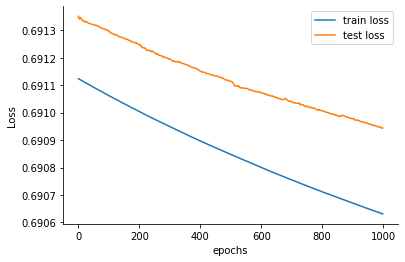

Train acc: 0.7757, Test acc: 0.7761


In [145]:
# fourth model
model4 = nn.Sequential(
    nn.Linear(D, int(D * 0.75)),
    nn.ReLU(),
    nn.Linear(int(D * 0.75), int(D * 0.5)),
    nn.ReLU(),
    nn.Linear(int(D * 0.5), int(D * 0.25)),
    nn.ReLU(),
    nn.Linear(int(D * 0.25), 1),
    nn.ReLU(),
    nn.Sigmoid()
)

train_losses4, test_losses4, model4 = train_model(X_train, y_train, X_test, y_test)

Epoch 50/1000, Train Loss: 0.6906, Test Loss: 0.6909
Epoch 100/1000, Train Loss: 0.6906, Test Loss: 0.6909
Epoch 150/1000, Train Loss: 0.6906, Test Loss: 0.6909
Epoch 200/1000, Train Loss: 0.6905, Test Loss: 0.6909
Epoch 250/1000, Train Loss: 0.6905, Test Loss: 0.6908
Epoch 300/1000, Train Loss: 0.6905, Test Loss: 0.6908
Epoch 350/1000, Train Loss: 0.6905, Test Loss: 0.6908
Epoch 400/1000, Train Loss: 0.6905, Test Loss: 0.6908
Epoch 450/1000, Train Loss: 0.6904, Test Loss: 0.6908
Epoch 500/1000, Train Loss: 0.6904, Test Loss: 0.6908
Epoch 550/1000, Train Loss: 0.6904, Test Loss: 0.6908
Epoch 600/1000, Train Loss: 0.6904, Test Loss: 0.6907
Epoch 650/1000, Train Loss: 0.6904, Test Loss: 0.6907
Epoch 700/1000, Train Loss: 0.6903, Test Loss: 0.6907
Epoch 750/1000, Train Loss: 0.6903, Test Loss: 0.6907
Epoch 800/1000, Train Loss: 0.6903, Test Loss: 0.6907
Epoch 850/1000, Train Loss: 0.6903, Test Loss: 0.6907
Epoch 900/1000, Train Loss: 0.6903, Test Loss: 0.6906
Epoch 950/1000, Train Loss: 0

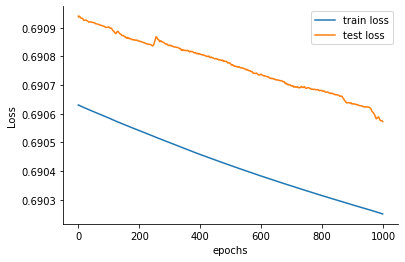

Train acc: 0.7770, Test acc: 0.7758


In [146]:
# fifth model
model5 = nn.Sequential(
    nn.Linear(D, int(D * 0.8)),
    nn.ReLU(),
    nn.Linear(int(D * 0.8), int(D * 0.6)),
    nn.ReLU(),
    nn.Linear(int(D * 0.6), int(D * 0.4)),
    nn.ReLU(),
    nn.Linear(int(D * 0.4), int(D * 0.2)),
    nn.ReLU(),
    nn.Linear(int(D * 0.2), 1),
    nn.ReLU(),
    nn.Sigmoid()
)

train_losses5, test_losses5, model5 = train_model(X_train, y_train, X_test, y_test)

1) test acc goes backward

2) overfitting 

In [156]:
# Score so far
train_acc = [0.7593, 0.7686, 0.7728, 0.7757, 0.7770]
test_acc = [0.7601, 0.7682, 0.7729, 0.7761, 0.7758]

acc = pd.DataFrame([train_acc, test_acc], index=['train acc', 'test acc']).T
acc

,train acc,test acc
0,0.7593,0.7601
1,0.7686,0.7682
2,0.7728,0.7729
3,0.7757,0.7761
4,0.7770,0.7758


In [162]:
idx = np.argmax(acc['test acc']) + 1
print(f'model{idx} is the best model so far.')

model4 is the best model so far.


# Try to add dropout layer

Epoch 50/1000, Train Loss: 0.6902, Test Loss: 0.6906
Epoch 100/1000, Train Loss: 0.6902, Test Loss: 0.6905
Epoch 150/1000, Train Loss: 0.6902, Test Loss: 0.6905
Epoch 200/1000, Train Loss: 0.6902, Test Loss: 0.6905
Epoch 250/1000, Train Loss: 0.6902, Test Loss: 0.6905
Epoch 300/1000, Train Loss: 0.6901, Test Loss: 0.6904
Epoch 350/1000, Train Loss: 0.6901, Test Loss: 0.6904
Epoch 400/1000, Train Loss: 0.6901, Test Loss: 0.6904
Epoch 450/1000, Train Loss: 0.6901, Test Loss: 0.6904
Epoch 500/1000, Train Loss: 0.6901, Test Loss: 0.6904
Epoch 550/1000, Train Loss: 0.6901, Test Loss: 0.6904
Epoch 600/1000, Train Loss: 0.6901, Test Loss: 0.6903
Epoch 650/1000, Train Loss: 0.6900, Test Loss: 0.6903
Epoch 700/1000, Train Loss: 0.6900, Test Loss: 0.6903
Epoch 750/1000, Train Loss: 0.6900, Test Loss: 0.6903
Epoch 800/1000, Train Loss: 0.6900, Test Loss: 0.6903
Epoch 850/1000, Train Loss: 0.6900, Test Loss: 0.6903
Epoch 900/1000, Train Loss: 0.6900, Test Loss: 0.6903
Epoch 950/1000, Train Loss: 0

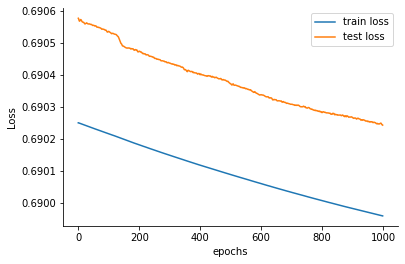

Train acc: 0.7784, Test acc: 0.7773


In [149]:
# fourth model with 0.5 drop out rate
model4_do = nn.Sequential(
    nn.Dropout(0.5),
    nn.Linear(D, int(D * 0.75)),
    nn.ReLU(),
    nn.Linear(int(D * 0.75), int(D * 0.5)),
    nn.ReLU(),
    nn.Linear(int(D * 0.5), int(D * 0.25)),
    nn.ReLU(),
    nn.Linear(int(D * 0.25), 1),
    nn.ReLU(),
    nn.Sigmoid()
)

train_losses4_do, test_losses4_do, model4_do = train_model(X_train, y_train, X_test, y_test)

Epoch 50/1000, Train Loss: 0.6899, Test Loss: 0.6902
Epoch 100/1000, Train Loss: 0.6899, Test Loss: 0.6902
Epoch 150/1000, Train Loss: 0.6899, Test Loss: 0.6902
Epoch 200/1000, Train Loss: 0.6899, Test Loss: 0.6902
Epoch 250/1000, Train Loss: 0.6899, Test Loss: 0.6902
Epoch 300/1000, Train Loss: 0.6899, Test Loss: 0.6902
Epoch 350/1000, Train Loss: 0.6899, Test Loss: 0.6902
Epoch 400/1000, Train Loss: 0.6899, Test Loss: 0.6902
Epoch 450/1000, Train Loss: 0.6898, Test Loss: 0.6902
Epoch 500/1000, Train Loss: 0.6898, Test Loss: 0.6902
Epoch 550/1000, Train Loss: 0.6898, Test Loss: 0.6901
Epoch 600/1000, Train Loss: 0.6898, Test Loss: 0.6901
Epoch 650/1000, Train Loss: 0.6898, Test Loss: 0.6901
Epoch 700/1000, Train Loss: 0.6898, Test Loss: 0.6901
Epoch 750/1000, Train Loss: 0.6898, Test Loss: 0.6901
Epoch 800/1000, Train Loss: 0.6898, Test Loss: 0.6901
Epoch 850/1000, Train Loss: 0.6898, Test Loss: 0.6901
Epoch 900/1000, Train Loss: 0.6898, Test Loss: 0.6901
Epoch 950/1000, Train Loss: 0

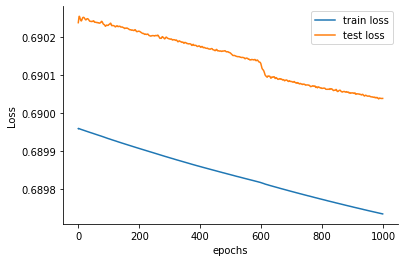

Train acc: 0.7793, Test acc: 0.7791


In [163]:
# fourth model with 0.4 drop out rate
model4_do = nn.Sequential(
    nn.Dropout(0.4),
    nn.Linear(D, int(D * 0.75)),
    nn.ReLU(),
    nn.Linear(int(D * 0.75), int(D * 0.5)),
    nn.ReLU(),
    nn.Linear(int(D * 0.5), int(D * 0.25)),
    nn.ReLU(),
    nn.Linear(int(D * 0.25), 1),
    nn.ReLU(),
    nn.Sigmoid()
)

train_losses4_do, test_losses4_do, model4_do = train_model(X_train, y_train, X_test, y_test)

0.4 is even better than 0.5

Epoch 50/1000, Train Loss: 0.6897, Test Loss: 0.6900
Epoch 100/1000, Train Loss: 0.6897, Test Loss: 0.6900
Epoch 150/1000, Train Loss: 0.6897, Test Loss: 0.6900
Epoch 200/1000, Train Loss: 0.6897, Test Loss: 0.6900
Epoch 250/1000, Train Loss: 0.6897, Test Loss: 0.6900
Epoch 300/1000, Train Loss: 0.6897, Test Loss: 0.6900
Epoch 350/1000, Train Loss: 0.6897, Test Loss: 0.6899
Epoch 400/1000, Train Loss: 0.6897, Test Loss: 0.6899
Epoch 450/1000, Train Loss: 0.6896, Test Loss: 0.6899
Epoch 500/1000, Train Loss: 0.6896, Test Loss: 0.6899
Epoch 550/1000, Train Loss: 0.6896, Test Loss: 0.6899
Epoch 600/1000, Train Loss: 0.6896, Test Loss: 0.6899
Epoch 650/1000, Train Loss: 0.6896, Test Loss: 0.6899
Epoch 700/1000, Train Loss: 0.6896, Test Loss: 0.6899
Epoch 750/1000, Train Loss: 0.6896, Test Loss: 0.6899
Epoch 800/1000, Train Loss: 0.6896, Test Loss: 0.6899
Epoch 850/1000, Train Loss: 0.6896, Test Loss: 0.6899
Epoch 900/1000, Train Loss: 0.6896, Test Loss: 0.6899
Epoch 950/1000, Train Loss: 0

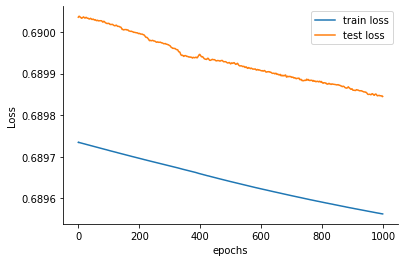

Train acc: 0.7800, Test acc: 0.7799


In [164]:
# fourth model with 0.3 drop out rate
model4_do = nn.Sequential(
    nn.Dropout(0.3),
    nn.Linear(D, int(D * 0.75)),
    nn.ReLU(),
    nn.Linear(int(D * 0.75), int(D * 0.5)),
    nn.ReLU(),
    nn.Linear(int(D * 0.5), int(D * 0.25)),
    nn.ReLU(),
    nn.Linear(int(D * 0.25), 1),
    nn.ReLU(),
    nn.Sigmoid()
)

train_losses4_do, test_losses4_do, model4_do = train_model(X_train, y_train, X_test, y_test)

0.3 is even better than 0.4

Epoch 50/1000, Train Loss: 0.6896, Test Loss: 0.6898
Epoch 100/1000, Train Loss: 0.6895, Test Loss: 0.6898
Epoch 150/1000, Train Loss: 0.6895, Test Loss: 0.6898
Epoch 200/1000, Train Loss: 0.6895, Test Loss: 0.6898
Epoch 250/1000, Train Loss: 0.6895, Test Loss: 0.6898
Epoch 300/1000, Train Loss: 0.6895, Test Loss: 0.6898
Epoch 350/1000, Train Loss: 0.6895, Test Loss: 0.6898
Epoch 400/1000, Train Loss: 0.6895, Test Loss: 0.6898
Epoch 450/1000, Train Loss: 0.6895, Test Loss: 0.6898
Epoch 500/1000, Train Loss: 0.6895, Test Loss: 0.6898
Epoch 550/1000, Train Loss: 0.6895, Test Loss: 0.6898
Epoch 600/1000, Train Loss: 0.6895, Test Loss: 0.6898
Epoch 650/1000, Train Loss: 0.6895, Test Loss: 0.6898
Epoch 700/1000, Train Loss: 0.6895, Test Loss: 0.6898
Epoch 750/1000, Train Loss: 0.6895, Test Loss: 0.6898
Epoch 800/1000, Train Loss: 0.6895, Test Loss: 0.6897
Epoch 850/1000, Train Loss: 0.6895, Test Loss: 0.6897
Epoch 900/1000, Train Loss: 0.6895, Test Loss: 0.6897
Epoch 950/1000, Train Loss: 0

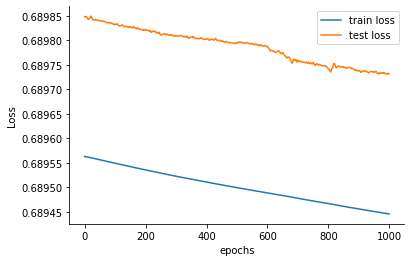

Train acc: 0.7808, Test acc: 0.7807


In [165]:
# fourth model with 0.2 drop out rate
model4_do = nn.Sequential(
    nn.Dropout(0.2),
    nn.Linear(D, int(D * 0.75)),
    nn.ReLU(),
    nn.Linear(int(D * 0.75), int(D * 0.5)),
    nn.ReLU(),
    nn.Linear(int(D * 0.5), int(D * 0.25)),
    nn.ReLU(),
    nn.Linear(int(D * 0.25), 1),
    nn.ReLU(),
    nn.Sigmoid()
)

train_losses4_do, test_losses4_do, model4_do = train_model(X_train, y_train, X_test, y_test)

0.2 is even better than 0.3

Epoch 50/1000, Train Loss: 0.6894, Test Loss: 0.6897
Epoch 100/1000, Train Loss: 0.6894, Test Loss: 0.6897
Epoch 150/1000, Train Loss: 0.6894, Test Loss: 0.6897
Epoch 200/1000, Train Loss: 0.6894, Test Loss: 0.6897
Epoch 250/1000, Train Loss: 0.6894, Test Loss: 0.6897
Epoch 300/1000, Train Loss: 0.6894, Test Loss: 0.6897
Epoch 350/1000, Train Loss: 0.6894, Test Loss: 0.6897
Epoch 400/1000, Train Loss: 0.6894, Test Loss: 0.6897
Epoch 450/1000, Train Loss: 0.6894, Test Loss: 0.6897
Epoch 500/1000, Train Loss: 0.6894, Test Loss: 0.6897
Epoch 550/1000, Train Loss: 0.6894, Test Loss: 0.6897
Epoch 600/1000, Train Loss: 0.6894, Test Loss: 0.6897
Epoch 650/1000, Train Loss: 0.6894, Test Loss: 0.6897
Epoch 700/1000, Train Loss: 0.6894, Test Loss: 0.6897
Epoch 750/1000, Train Loss: 0.6894, Test Loss: 0.6897
Epoch 800/1000, Train Loss: 0.6894, Test Loss: 0.6897
Epoch 850/1000, Train Loss: 0.6894, Test Loss: 0.6897
Epoch 900/1000, Train Loss: 0.6894, Test Loss: 0.6896
Epoch 950/1000, Train Loss: 0

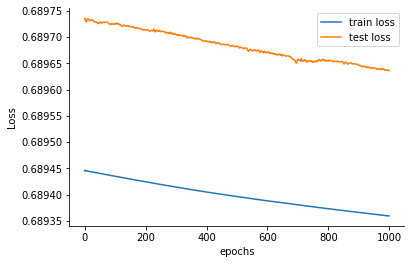

Train acc: 0.7813, Test acc: 0.7820


In [166]:
# fourth model with 0.1 drop out rate
model4_do = nn.Sequential(
    nn.Dropout(0.1),
    nn.Linear(D, int(D * 0.75)),
    nn.ReLU(),
    nn.Linear(int(D * 0.75), int(D * 0.5)),
    nn.ReLU(),
    nn.Linear(int(D * 0.5), int(D * 0.25)),
    nn.ReLU(),
    nn.Linear(int(D * 0.25), 1),
    nn.ReLU(),
    nn.Sigmoid()
)

train_losses4_do, test_losses4_do, model4_do = train_model(X_train, y_train, X_test, y_test)

1) 0.1 is even better than 0.2

2) underfitting occurs

Epoch 50/1000, Train Loss: 0.6894, Test Loss: 0.6896
Epoch 100/1000, Train Loss: 0.6894, Test Loss: 0.6896
Epoch 150/1000, Train Loss: 0.6893, Test Loss: 0.6896
Epoch 200/1000, Train Loss: 0.6893, Test Loss: 0.6896
Epoch 250/1000, Train Loss: 0.6893, Test Loss: 0.6896
Epoch 300/1000, Train Loss: 0.6893, Test Loss: 0.6896
Epoch 350/1000, Train Loss: 0.6893, Test Loss: 0.6896
Epoch 400/1000, Train Loss: 0.6893, Test Loss: 0.6896
Epoch 450/1000, Train Loss: 0.6893, Test Loss: 0.6896
Epoch 500/1000, Train Loss: 0.6893, Test Loss: 0.6896
Epoch 550/1000, Train Loss: 0.6893, Test Loss: 0.6896
Epoch 600/1000, Train Loss: 0.6893, Test Loss: 0.6896
Epoch 650/1000, Train Loss: 0.6893, Test Loss: 0.6896
Epoch 700/1000, Train Loss: 0.6893, Test Loss: 0.6896
Epoch 750/1000, Train Loss: 0.6893, Test Loss: 0.6895
Epoch 800/1000, Train Loss: 0.6893, Test Loss: 0.6895
Epoch 850/1000, Train Loss: 0.6893, Test Loss: 0.6895
Epoch 900/1000, Train Loss: 0.6893, Test Loss: 0.6895
Epoch 950/1000, Train Loss: 0

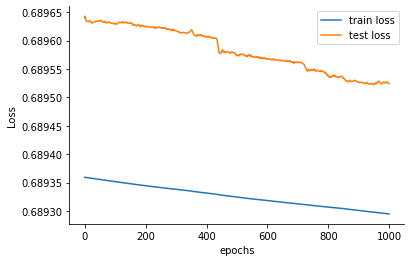

Train acc: 0.7813, Test acc: 0.7821


In [168]:
# fourth model with 0.05 drop out rate
model4_do = nn.Sequential(
    nn.Dropout(0.05),
    nn.Linear(D, int(D * 0.75)),
    nn.ReLU(),
    nn.Linear(int(D * 0.75), int(D * 0.5)),
    nn.ReLU(),
    nn.Linear(int(D * 0.5), int(D * 0.25)),
    nn.ReLU(),
    nn.Linear(int(D * 0.25), 1),
    nn.ReLU(),
    nn.Sigmoid()
)

train_losses4_do, test_losses4_do, model4_do = train_model(X_train, y_train, X_test, y_test)

1) 0.05 is even better than 0.1

2) underfitting got worsened

Epoch 50/1000, Train Loss: 0.6893, Test Loss: 0.6895
Epoch 100/1000, Train Loss: 0.6893, Test Loss: 0.6895
Epoch 150/1000, Train Loss: 0.6893, Test Loss: 0.6895
Epoch 200/1000, Train Loss: 0.6893, Test Loss: 0.6895
Epoch 250/1000, Train Loss: 0.6893, Test Loss: 0.6895
Epoch 300/1000, Train Loss: 0.6893, Test Loss: 0.6895
Epoch 350/1000, Train Loss: 0.6893, Test Loss: 0.6895
Epoch 400/1000, Train Loss: 0.6893, Test Loss: 0.6895
Epoch 450/1000, Train Loss: 0.6893, Test Loss: 0.6895
Epoch 500/1000, Train Loss: 0.6893, Test Loss: 0.6895
Epoch 550/1000, Train Loss: 0.6893, Test Loss: 0.6895
Epoch 600/1000, Train Loss: 0.6893, Test Loss: 0.6895
Epoch 650/1000, Train Loss: 0.6893, Test Loss: 0.6895
Epoch 700/1000, Train Loss: 0.6893, Test Loss: 0.6895
Epoch 750/1000, Train Loss: 0.6893, Test Loss: 0.6895
Epoch 800/1000, Train Loss: 0.6892, Test Loss: 0.6895
Epoch 850/1000, Train Loss: 0.6892, Test Loss: 0.6895
Epoch 900/1000, Train Loss: 0.6892, Test Loss: 0.6895
Epoch 950/1000, Train Loss: 0

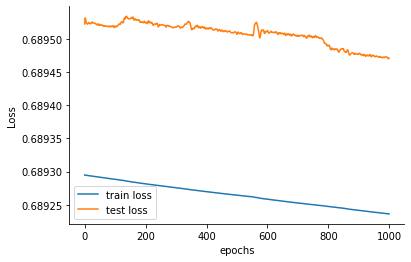

Train acc: 0.7810, Test acc: 0.7829


In [169]:
# fourth model with 0.025 drop out rate
model4_do = nn.Sequential(
    nn.Dropout(0.025),
    nn.Linear(D, int(D * 0.75)),
    nn.ReLU(),
    nn.Linear(int(D * 0.75), int(D * 0.5)),
    nn.ReLU(),
    nn.Linear(int(D * 0.5), int(D * 0.25)),
    nn.ReLU(),
    nn.Linear(int(D * 0.25), 1),
    nn.ReLU(),
    nn.Sigmoid()
)

train_losses4_do, test_losses4_do, model4_do = train_model(X_train, y_train, X_test, y_test)

1) 0.025 is even better than 0.05

2) underfitting got worsened

Epoch 50/1000, Train Loss: 0.6892, Test Loss: 0.6895
Epoch 100/1000, Train Loss: 0.6892, Test Loss: 0.6895
Epoch 150/1000, Train Loss: 0.6892, Test Loss: 0.6895
Epoch 200/1000, Train Loss: 0.6892, Test Loss: 0.6895
Epoch 250/1000, Train Loss: 0.6892, Test Loss: 0.6895
Epoch 300/1000, Train Loss: 0.6892, Test Loss: 0.6895
Epoch 350/1000, Train Loss: 0.6892, Test Loss: 0.6895
Epoch 400/1000, Train Loss: 0.6892, Test Loss: 0.6895
Epoch 450/1000, Train Loss: 0.6892, Test Loss: 0.6895
Epoch 500/1000, Train Loss: 0.6892, Test Loss: 0.6895
Epoch 550/1000, Train Loss: 0.6892, Test Loss: 0.6895
Epoch 600/1000, Train Loss: 0.6892, Test Loss: 0.6895
Epoch 650/1000, Train Loss: 0.6892, Test Loss: 0.6895
Epoch 700/1000, Train Loss: 0.6892, Test Loss: 0.6895
Epoch 750/1000, Train Loss: 0.6892, Test Loss: 0.6895
Epoch 800/1000, Train Loss: 0.6892, Test Loss: 0.6894
Epoch 850/1000, Train Loss: 0.6892, Test Loss: 0.6894
Epoch 900/1000, Train Loss: 0.6892, Test Loss: 0.6894
Epoch 950/1000, Train Loss: 0

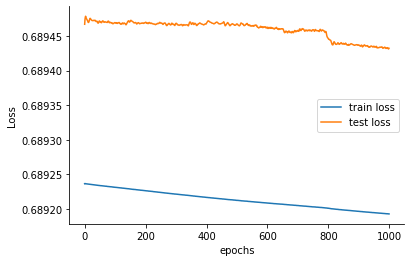

Train acc: 0.7811, Test acc: 0.7826


In [170]:
# fourth model with 0.0125 drop out rate
model4_do = nn.Sequential(
    nn.Dropout(0.0125),
    nn.Linear(D, int(D * 0.75)),
    nn.ReLU(),
    nn.Linear(int(D * 0.75), int(D * 0.5)),
    nn.ReLU(),
    nn.Linear(int(D * 0.5), int(D * 0.25)),
    nn.ReLU(),
    nn.Linear(int(D * 0.25), 1),
    nn.ReLU(),
    nn.Sigmoid()
)

train_losses4_do, test_losses4_do, model4_do = train_model(X_train, y_train, X_test, y_test)

test acc goes backward

In [172]:
# acc with do so far
train_acc = [0.7793, 0.7800, 0.7808, 0.7813, 0.7813, 0.7810, 0.7811]
test_acc = [0.7791, 0.7799, 0.7807, 0.7820, 0.7821, 0.7829, 0.7826]

acc = pd.DataFrame([train_acc, test_acc], index=['train acc', 'test acc']).T
acc

,train acc,test acc
0,0.7793,0.7791
1,0.7800,0.7799
2,0.7808,0.7807
3,0.7813,0.7820
4,0.7813,0.7821
5,0.7810,0.7829
6,0.7811,0.7826


In [173]:
idx = np.argmax(acc['test acc']) + 1
print(f'model{idx} is the best model so far.')

model6 is the best model so far.


# Since underfitting occurs, we might try to increase the number of features. 